<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/CNN/YOLO/08_06_YOLO_Keras_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 測試 TensorFlow/Keras YOLO格式檔

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
%cd /app/DL_Book/src

Mounted at /content/gdrive
/content/gdrive/My Drive/DL_Book/src


In [2]:
# 載入套件
from yolo_keras_utils import *
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import add, concatenate
from tensorflow.keras.models import Model

In [3]:
# 測試
from tensorflow.keras.models import load_model

image_filename = '../images_Object_Detection/zebra.jpg' # 測試圖像

model = load_model('../YOLO_weights/yolov3.h5')   # 載入模型
input_w, input_h = 416, 416      # YOLO v3 圖像尺寸
# 載入圖像，並縮放尺寸為 (416, 416)
image, image_w, image_h = load_image_pixels(image_filename, (input_w, input_h))
# 預測圖像
yhat = model.predict(image)
# 傳回偵測的物件資訊
print([a.shape for a in yhat])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


In [4]:
# 輸出轉換
# 每個陣列內前兩個值為grid寬/高，後四個為 anchors 的作標與尺寸
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

# 設定物件偵測的機率門檻
class_threshold = 0.6

# 依 anchors 的尺寸及機率門檻篩選 Bounding Box
boxes = list()
for i in range(len(yhat)):
    boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
    
# 依原圖尺寸與縮放尺寸的比例， 校正 Bounding Box 尺寸
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)

#  使用 non-maximal suppress，移除重疊的 Bounding Box
do_nms(boxes, 0.5)

Bounding Box 個數：3
類別：zebra, 機率：94.91059184074402
類別：zebra, 機率：99.86329674720764
類別：zebra, 機率：96.8708872795105


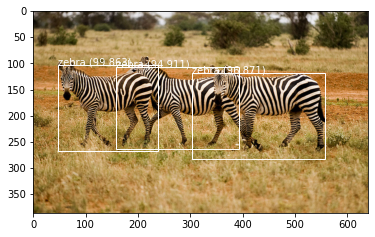

In [5]:
# 取得 Bounding Box 資訊：座標、類別、機率
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)

# 顯示執行結果
print(f'Bounding Box 個數：{len(v_boxes)}')
for i in range(len(v_boxes)):
    print(f'類別：{v_labels[i]}, 機率：{v_scores[i]}')

# 繪圖
draw_boxes(image_filename, v_boxes, v_labels, v_scores)